In [1]:

import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, datasets, metrics
from sklearn.metrics import auc, roc_auc_score, roc_curve, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import StandardScaler

from imblearn.combine import *
from imblearn.over_sampling import *


## Trainset

In [2]:
df= pd.read_csv('Train_df.csv')
df = df.astype(np.float64)

In [3]:
df

,0,1,2,3,4,5,6,7,8,9,...,1023,MW,ALOGP,HBA,HBD,PSA,ROTB,AROM,ALERTS,toxicity
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.769322,-0.669915,-0.019260,0.733783,0.213807,-0.463486,-0.413353,-0.009528,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,-0.022689,0.682386,-0.266282,-0.435030,-0.237935,-0.034662,1.400988,-0.009528,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,-0.450835,-0.214675,-0.513305,-0.824635,-0.418376,-0.892310,-0.413353,-0.897540,1.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.266304,0.465546,0.227762,-0.824635,-0.359040,0.179750,0.493817,-0.009528,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.478688,-1.225306,0.227762,0.733783,0.320815,-0.677898,-0.413353,-0.897540,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1393,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,3.601285,-2.526262,2.697986,4.240223,4.495807,2.967107,0.493817,2.654509,0.0
1394,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.958710,-0.825128,3.439053,2.681805,2.500453,1.037399,-1.320523,0.878484,0.0
1395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.102378,0.773643,0.968830,-0.435030,0.274936,0.394162,1.400988,-0.009528,0.0
1396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.990976,1.782411,-0.266282,-0.824635,-0.359040,2.109459,0.493817,0.878484,0.0


In [4]:
df['toxicity'].value_counts()

1.0    768
0.0    630
Name: toxicity, dtype: int64

In [4]:
x_train = df.iloc[:,:1032]
y_train = df['toxicity']

## Testset

In [5]:
test = pd.read_csv('Test_df.csv')
test = test.astype(np.float64)
test

,0,1,2,3,4,5,6,7,8,9,...,1023,MW,ALOGP,HBA,HBD,PSA,ROTB,AROM,ALERTS,toxicity
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.031682,-0.078206,0.124693,-0.070660,0.065800,-0.124521,0.271724,1.806079,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.372504,0.310100,-0.362862,-0.288668,-0.316390,-0.396949,0.271724,-0.882223,1.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.197573,0.416506,0.514738,0.147348,0.548903,0.365849,-1.181759,0.013878,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.359417,0.502600,-0.362862,-0.288668,-0.322430,-0.233492,0.271724,-0.882223,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.391879,-0.475822,-0.167840,-0.179664,-0.065423,-0.342464,-0.455017,0.013878,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.015372,-0.448783,0.417227,0.365357,0.327722,0.093421,0.271724,0.013878,0.0
448,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.054410,-1.006187,0.417227,0.147348,0.284919,0.038936,0.271724,0.013878,0.0
449,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.103049,-0.068065,0.417227,0.147348,0.200175,-0.233492,0.998466,0.013878,0.0
450,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.749251,-0.122274,1.099804,0.910377,0.731408,-0.287978,-1.181759,0.013878,0.0


In [6]:
x_test = test.iloc[:,:1032]
y_test = test['toxicity']

In [7]:
# # train validation set 나누기


# x_train, x_val, y_train,y_val = train_test_split(x_df,y_df,train_size=0.8, random_state=42)


# print(y_train.value_counts())
# print(y_val.value_counts())

In [8]:

from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix, precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

#n_estimators=50,max_features=24, max_depth=190

rand = RandomForestClassifier()
parameters = {'n_estimators':[10,30,50,70,90], 'max_features':[18,20,22,24],'max_depth':[100,130,150,170]}
rf = RandomizedSearchCV(rand,parameters,n_iter=50, cv=10, refit=True, return_train_score=True)
rf.fit(X=x_train, y=y_train)
print(rf.best_params_)

{'n_estimators': 90, 'max_features': 18, 'max_depth': 130}


In [9]:
scores_df = pd.DataFrame(rf.cv_results_)
scores_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.112125,0.002810,0.008702,4.585575e-04,30,24,170,"{'n_estimators': 30, 'max_features': 24, 'max_...",0.600000,0.671429,...,0.996025,0.996820,0.997615,0.995231,0.995231,0.995231,0.995234,0.995234,0.996026,0.000870
1,0.042419,0.000672,0.006901,3.000738e-04,10,18,100,"{'n_estimators': 10, 'max_features': 18, 'max_...",0.578571,0.521429,...,0.984102,0.984102,0.987281,0.986486,0.982512,0.987281,0.986497,0.982526,0.985138,0.002332
2,0.106724,0.001346,0.008402,4.899697e-04,30,22,150,"{'n_estimators': 30, 'max_features': 22, 'max_...",0.635714,0.650000,...,0.995231,0.996820,0.997615,0.996025,0.996820,0.996025,0.996029,0.995234,0.996424,0.000814
3,0.300680,0.008007,0.013803,6.000760e-04,90,22,100,"{'n_estimators': 90, 'max_features': 22, 'max_...",0.614286,0.707143,...,0.996025,0.996820,0.998410,0.996025,0.996820,0.996025,0.996823,0.996823,0.996821,0.000711
4,0.223051,0.001483,0.012103,2.997400e-04,70,20,130,"{'n_estimators': 70, 'max_features': 20, 'max_...",0.607143,0.678571,...,0.996025,0.996820,0.998410,0.996025,0.996820,0.996025,0.996823,0.996823,0.996821,0.000711
5,0.045010,0.000895,0.006801,4.001022e-04,10,22,170,"{'n_estimators': 10, 'max_features': 22, 'max_...",0.557143,0.650000,...,0.988076,0.993641,0.983307,0.983307,0.985692,0.984102,0.984909,0.988880,0.986012,0.003432
6,0.286665,0.008948,0.013803,4.002690e-04,90,20,100,"{'n_estimators': 90, 'max_features': 20, 'max_...",0.671429,0.678571,...,0.996025,0.996820,0.998410,0.996025,0.996820,0.996025,0.996823,0.996823,0.996821,0.000711
7,0.162341,0.002198,0.010402,4.900767e-04,50,20,100,"{'n_estimators': 50, 'max_features': 20, 'max_...",0.628571,0.664286,...,0.996025,0.996820,0.998410,0.996025,0.996820,0.996025,0.996823,0.996823,0.996741,0.000660
8,0.107524,0.005125,0.008602,8.003175e-04,30,20,100,"{'n_estimators': 30, 'max_features': 20, 'max_...",0.578571,0.628571,...,0.996025,0.996025,0.998410,0.996025,0.996025,0.996025,0.996029,0.996823,0.996582,0.000799
9,0.307270,0.003943,0.013504,4.992074e-04,90,24,150,"{'n_estimators': 90, 'max_features': 24, 'max_...",0.657143,0.642857,...,0.996025,0.996820,0.998410,0.996025,0.996820,0.996025,0.996823,0.996823,0.996821,0.000711


In [7]:
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix, precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(random_state=50, n_estimators=90,max_features=18, max_depth=130)

model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred_proba = model.predict_proba(x_test)[:,1]


pred_train = model.predict(x_train)


train_score = accuracy_score(y_train,pred_train)



Precision = precision_score(y_test, y_pred)
Recall = recall_score(y_test, y_pred)

print('accuracy : {0}'.format(accuracy_score(y_test, y_pred)))
print('Precision : {0}'.format(Precision))
print('Recall : {0}'.format(Recall))
print('ROC_score :', roc_auc_score(y_test, y_pred_proba))

F1_score = 2*(Precision*Recall)/(Precision+Recall)
print("F1 score : {0}".format(F1_score))

#print('[train] acc: {:.3f}' .format(rand_clf.score(x, y)))


accuracy : 0.9048672566371682
Precision : 0.8341232227488151
Recall : 0.9565217391304348
ROC_score : 0.9735054347826088
F1 score : 0.8911392405063291


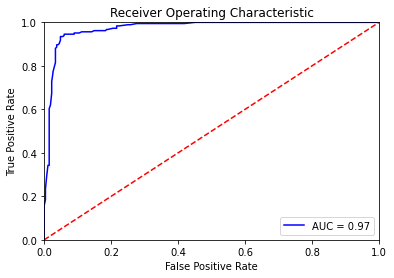

In [8]:
import matplotlib.pyplot as plt

# ROC curve
from sklearn.metrics import roc_auc_score,roc_curve,auc

fpr, tpr, threshold = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

roc = pd.DataFrame({
    'FPR': fpr,
    'TPRate': tpr,
    'Threshold': threshold
})

optimal_idx=np.argmax(tpr-fpr)
optimal_threshold= threshold[optimal_idx]


plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

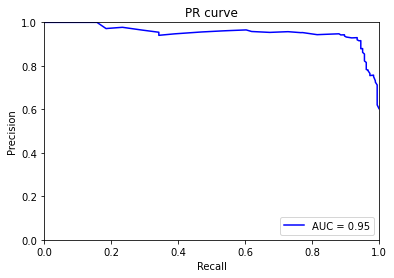

In [9]:
# precision, recall, threshold 생성
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
# pr_auc 정의
pr_auc = auc(recall, precision)
# F1 score 정의
F1 = 2*(precision*recall)/(precision+recall)

plt.title('PR curve')
plt.plot(recall, precision, 'b', label = 'AUC = %0.2f' % pr_auc)
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

In [10]:
d_t = pd.DataFrame(y_test)
d_t = d_t.reset_index(drop=True)
d_preds = pd.DataFrame(y_pred_proba)
pred_proba = pd.concat([d_t,d_preds],axis=1)
pred_proba.columns=['toxicity','prediction']
pred_proba.sort_values(by='prediction',ascending=True)

,toxicity,prediction
190,0.0,0.044444
218,0.0,0.055556
360,0.0,0.055556
233,0.0,0.066667
333,0.0,0.066667
...,...,...
110,1.0,0.933333
102,1.0,0.933333
153,1.0,0.955556
36,1.0,0.955556


In [11]:
preds_1d = y_pred_proba.flatten()
pred_class = np.where(preds_1d> optimal_threshold,1,0)

In [12]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

print('idx:',optimal_idx,', threshold:',optimal_threshold )

auc_score = roc_auc_score(y_test, y_pred_proba)
accuracy_score = accuracy_score(y_test,pred_class)
Precision = precision_score(y_test,pred_class)
Recall = recall_score(y_test,pred_class)
print('AUC:',auc_score)
#print('ACC:',accuracy_score)
#print('Precision : {0}'.format(Precision))
#print('Recall : {0}'.format(Recall))
F1_score = 2*(Precision*Recall)/(Precision+Recall)
#print("F1 score : {0}".format(F1_score))

idx: 41 , threshold: 0.5944444444444444
AUC: 0.9735054347826088


In [13]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

# 테스트 셋에 대한 분류 수행 결과 및 점수
test_preds = model.predict(x_test)

test_preds[test_preds >= optimal_threshold] = 1
test_preds[test_preds < optimal_threshold] = 0

Precision = precision_score(y_test, test_preds)
Recall = recall_score(y_test, test_preds)

model_roc = model.predict(x_test)

print('accuracy : {0}'.format(accuracy_score(y_test, test_preds)))
print('Precision : {0}'.format(Precision))
print('Recall : {0}'.format(Recall))
print('ROC_score : {0}'.format(roc_auc_score(y_test, y_pred_proba)))

F1_score = 2*(Precision*Recall)/(Precision+Recall)
print("F1 score : {0}".format(F1_score))

accuracy : 0.9048672566371682
Precision : 0.8341232227488151
Recall : 0.9565217391304348
ROC_score : 0.9735054347826088
F1 score : 0.8911392405063291


In [14]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn+fp)
specificity

0.8694029850746269

In [16]:
import joblib 

filename = 'RF.pkl'
joblib.dump(model,filename)

['RF.pkl']